# Author : Ravi Vishwakarma


# Data Science & Business Analytics Intern

# Task 1 : Prediction using Supervised Machine Learning

# GRIP @ The Sparks Foundation
Predicting the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  

# Objective : Predicted score if a student studies for 9.25 hrs/ day?

# Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib, Seaborn ,Cross Validation

In [50]:
# Importing the required Libraries need for analysis
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Step 1 - Reading The Data 

In [84]:
data = pd.read_csv("http://bit.ly/w-data")
print(data.head())
print(data.tail())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Representing the frist and last 5 dataset.

# Step 2 - Exploratory Data Analysis

In [53]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [54]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


This shows concise summary of the DataFrame

In [56]:
data.shape

(25, 2)

This shows number of rows and columns present in the data set

In [57]:
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


This shows the data doesn't have any Null(missing) values

In [58]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


This shows the descriptive statistics.

#  Step 3- Data Visualization

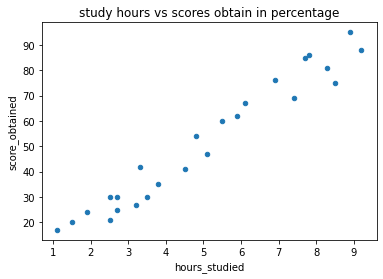

In [59]:
data.plot(x= "Hours", y= "Scores" , kind = "scatter",style = "0")
plt.title("study hours vs scores obtain in percentage")
plt.xlabel("hours_studied")
plt.ylabel("score_obtained")
plt.show()


# Step 4 - Regression Model

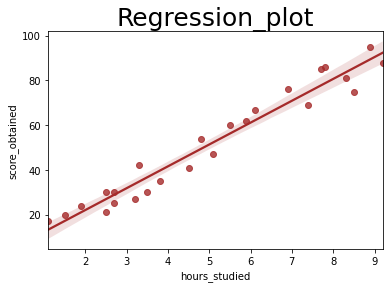

In [60]:
sns.regplot(x= data["Hours"],y= data["Scores"], color= "brown")
plt.title("Regression_plot", size=25)
plt.xlabel("hours_studied")
plt.ylabel("score_obtained")
plt.show()

In [61]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows that data is positively correlated

# Step 5 - Now splitting the dataset into train and test data

In [62]:
x=data[["Hours"]]
y=data["Scores"]

#splitting the data into 80% data for training and 20% data for testing.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [74]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


# Step 6 - Building the Linear Regression Model  

In [64]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [78]:
regression.coef_

array([9.91065648])

In [79]:
regression.intercept_

2.0181600414346974

### Prediction of dataset

In [65]:
y_pred=regression.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Here y_pred is a numpy array that contains all the predicted values for the input values in the x_test series.

In [66]:
#comparing Actual and Predicted values for x_test
df=pd.DataFrame({"Actual" : y_test, "predicted": y_pred})
df

,Actual,predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Step 6 - Visualization of actual and predicted marks

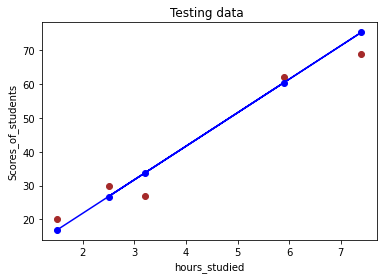

In [81]:
plt.scatter(x_test,y_test, color="brown")
plt.plot(x_test,y_pred, marker='o', color="blue")
plt.xlabel("hours_studied")
plt.ylabel("Scores_of_students")
plt.title("Testing data ")
plt.show()


# Step 7 - Model Accuracy using mean Square Error

In [68]:
#model_accuracy
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
print("mean_abs_error :" , mean_abs_error)
print("R-2 Score :", metrics.r2_score(y_test,y_pred))

mean_abs_error : 4.183859899002975
R-2 Score : 0.9454906892105355


# Step 8- Cross validation of model

In [71]:
model=cross_val_score(regression,x,y)
print(model)
model.mean()*100

[0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]


91.80771341891051

Using the cross validation score to reduce the overfitting or selection bias of our model.

In [70]:
#prediction of percentage got by student for study of 9.25 hours per day.
Hours=[9.25]
percentage = regression.predict([Hours])
print("Precentage of student who studied 9.25 hrs per day is: ",format(round(percentage[0],2)))

Precentage of student who studied 9.25 hrs per day is:  93.69


Now from above score we can comment that our model is 92% accurate

Thank You